In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

%matplotlib inline

In [315]:
## Gradient method
def Logistic_GD(W,X,Y,Niter,eta  = 0.001,lam = 1):
    # Make sure it is in matrix form
    W = np.matrix(W)
    X = np.matrix(X)
    Y = np.matrix(Y)
    # Initialize other parameters
    N    = len(x) # Number of data points being processed
    Costarray = np.zeros(Niter)
    # Initialize gradient array
    parameters = int(W.ravel().shape[1])
    dW = np.zeros(parameters)
    for it in range(0,Niter):
        # Calculate gradient of cost function
        error = Y-sigmoid(np.dot(X,W.T)) # error (residual)
        dW    = np.dot(error.T,X)/N
        # include regularization term
        reg = np.multiply((lam / N),W)
        reg[0,0] = 0 # don't penalize bias
        # Update Parameters (theta)
        W = W + dW*eta 
        # Record cost
        Costarray[it] =  cost(W, X, Y)
    return W,Costarray

## Using built in optimizer  [ Much Faster!!]    
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

# Activation functions
def sigmoid(z):
    # 1/(1 + exp(-w.T x))
    return 1 / (1 + np.exp(-z))

def tanH(z):
    # exp(z) - exp(-z) / exp(z) + exp(-z)
    top    = np.exp(z) - np.exp(-z)
    bottom = np.exp(z) + np.exp(-z)
    return top / bottom

# Cost function
def cost(theta, X, y,learningRate = 0):
    # Make sure it is in matrix form
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    # Cost function in ln(p(Ck_x)) of bernouli
    rho = sigmoid(X * theta.T)
    first = np.multiply(-y, np.log(rho))
    second = np.multiply((1 - y), np.log(1 - rho))
    # Regularization term (penalize complixity)
    theta_HigherOrder = theta[:,1:theta.shape[1]]
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta_HigherOrder, 2))
    return np.sum(first - second) / (len(X)) + reg

# Classification funciton
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

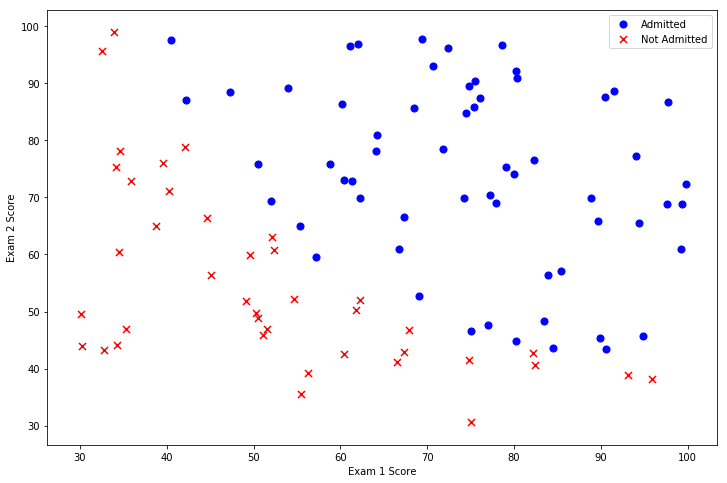

In [332]:
import os
path = os.getcwd() + '/data/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
# Visualize data
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [248]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

In [249]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
Y = np.array(y.values)
theta = np.zeros(3)
# Initial cost


In [250]:
# Optimization function:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, Y))
# Return theta parameter
# Other
theta_min = np.matrix(result[0])
print("Final: Theta \t\t Cost")
print("\t",theta_min,"\t",cost(theta_min, X, Y),"\n")
# Print Prediction Accuracy
# Other
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

Final: Theta 		 Cost
	 [[-25.16131861   0.20623159   0.20147149]] 	 0.203497701589 

accuracy = 89%


0.69314718056


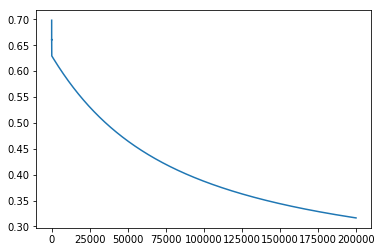

Final: w_min 		 Cost
	 [[-7.45017822  0.06550395  0.05898701]] 	 0.316554335209 



In [301]:
x = np.matrix(X)
y = np.matrix(Y)
w = np.matrix(np.zeros(3))
Niter = 200000
print(cost(w, x, y))
w_min,costarray = Logistic_GD(w,x,y,Niter)
plt.plot(costarray)
plt.show()
print("Final: w_min \t\t Cost")
print("\t",w_min,"\t",cost(w_min, x, y),"\n")

In [302]:
print(w_min)
predictions = predict(w_min, x)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

[[-7.45017822  0.06550395  0.05898701]]
accuracy = 93%


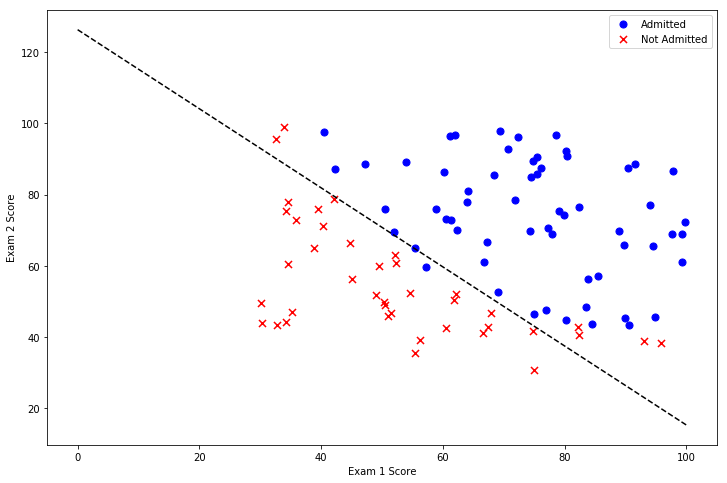

In [336]:
# Drawing the Descision Boundary
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
# Our decision boundary is now formed by the line where sigma(a) = 0.5, i.e. where a = 0, 
# which for this example is where phi2 = -(w1/w2)phi1, i.e. where w * phi = .5
bdryx = (0,100)
bdryy = (-(w_min[0,0]+w_min[0,1]*bdryx[0])/w_min[0,2], -(w_min[0,0]+w_min[0,1]*bdryx[1])/w_min[0,2])
plt.plot(bdryx, bdryy,'k--')
plt.show()

In [371]:
# Dealing with Non-Linear Relationships
path = os.getcwd() + '/data/ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()


,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


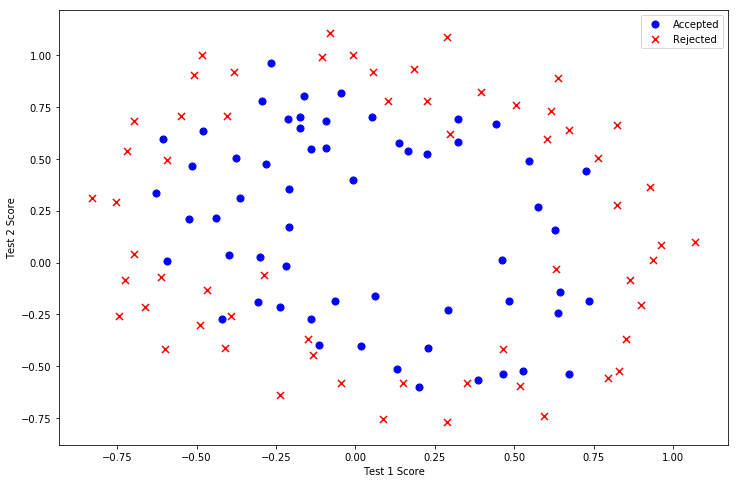

In [372]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [373]:
degree = 3
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        print("\tx",i,j)
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, i-j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

	x 1 0
	x 2 0
	x 2 1


,Accepted,Ones,F10,F20,F21
0,1,1,0.035864,0.001286,0.035864
1,1,1,-0.063523,0.004035,-0.063523
2,1,1,-0.147941,0.021886,-0.147941
3,1,1,-0.188321,0.035465,-0.188321
4,1,1,-0.238990,0.057116,-0.238990


0.69314718056


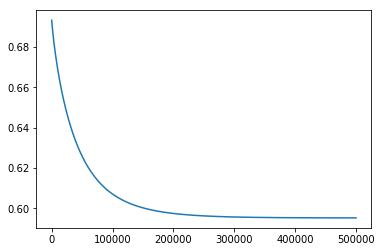

Final: w_min2 		 Cost
	 [[ 0.894439    0.56240928 -4.32429346 -1.46394856]] 	 0.595328750377 



In [351]:
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
Y2 = np.array(y2.values)
W2 = np.zeros(4)
Niter = 500000
print(cost(W2, X2, Y2))
w_min2,costarray2 = Logistic_GD(W2,X2,Y2,Niter)
plt.plot(costarray2)
plt.show()
print("Final: w_min2 \t\t Cost")
print("\t",w_min2,"\t",cost(w_min2, X2, Y2),"\n")

In [352]:
predictions = predict(w_min2, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 77%


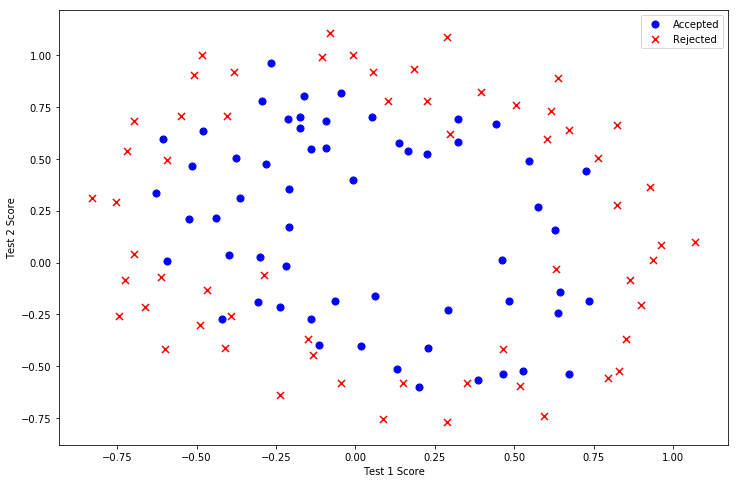

In [385]:
path = os.getcwd() + '/data/ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

# Our decision boundary is now formed by the line where sigma(a) = 0.5, i.e. where a = 0, 
# which for this example is where phi2 = -(w1/w2)phi1, i.e. where w * phi = .5
#bdryx = np.arange(-0.75,1,0.2)
#bias  = w_min[0,0] #w0
#term1 = np.multiply(bdryx,w_min2[0,1])  # x10w1
#term2 = np.multiply(bdryx,w_min2[0,2])  # x20w2
#dterm1 = np.multiply(bdryx,w_min2[0,3]) # x20w3
#bdryy = -(bias+term1+term2)/dterm1
#ax.plot(bdryx, bdryy,'k--')

#print(bdryy)

In [378]:
print(w_min)
## Built in Python Library
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l1', C=1.0)
model.fit(X2, Y2.ravel())
model.score(X2, y2)

[[-7.45017822  0.06550395  0.05898701]]


0.65254237288135597